In [1]:
pip install osmnx


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


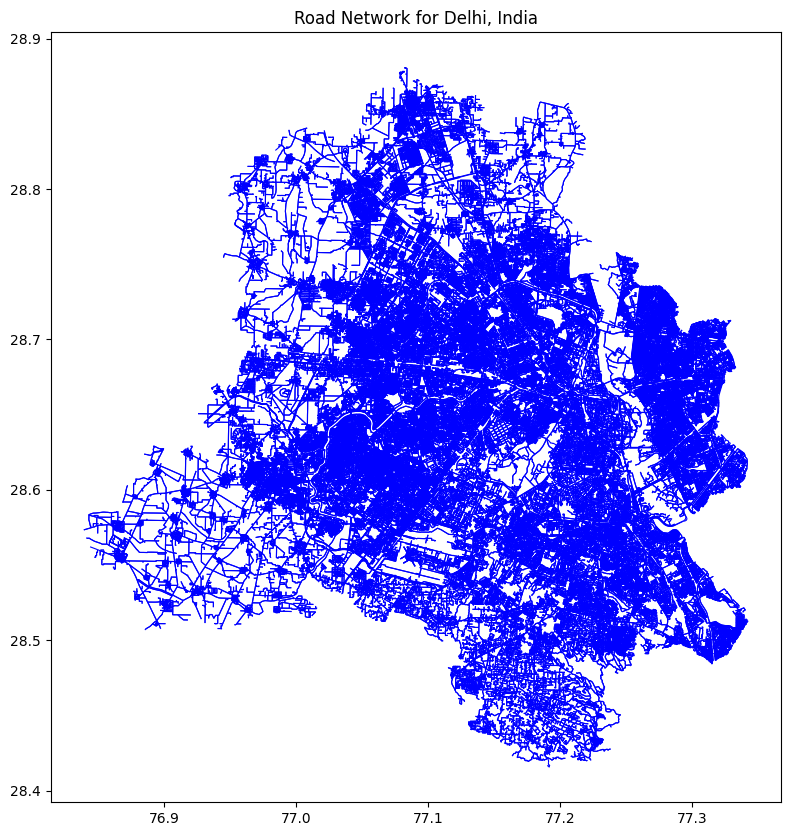

In [2]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt


place_name = "Delhi, India"


road_graph = ox.graph_from_place(place_name, network_type='all')

# Converting  the road network graph to GeoDataFrame
road_gdf = ox.graph_to_gdfs(road_graph, nodes=False)

# Plotting  the road network
fig, ax = plt.subplots(figsize=(10, 10))
road_gdf.plot(ax=ax, linewidth=0.8, color='blue')
plt.title(f"Road Network for {place_name}")
plt.show()


In [3]:
import random
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString


road_gdf = ox.graph_to_gdfs(road_graph, nodes=False)

# Simulate some random GNSS points along the road network
num_points = 500
gnss_data = []

for _ in range(num_points):
    random_road = road_gdf.sample(n=1)
    road_coords = list(random_road.geometry.values[0].coords)


    start_point, end_point = random.sample(road_coords, 2)
    random_point = Point(
        [
            random.uniform(start_point[0], end_point[0]),
            random.uniform(start_point[1], end_point[1]),
        ]
    )
    gnss_data.append({
        'latitude': random_point.y,
        'longitude': random_point.x,
        'timestamp': pd.Timestamp.now(),
        'speed': random.uniform(10, 60)
    })


gnss_df = pd.DataFrame(gnss_data)
geometry = [Point(xy) for xy in zip(gnss_df.longitude, gnss_df.latitude)]
gnss_gdf = gpd.GeoDataFrame(gnss_df, geometry=geometry, crs='EPSG:4326')

# Saving the GNSS data to a CSV file
gnss_gdf.to_csv('simulated_gnss_data_delhi.csv', index=False)
print("Simulated GNSS data saved to 'simulated_gnss_data_delhi.csv'.")


Simulated GNSS data saved to 'simulated_gnss_data_delhi.csv'.


    latitude  longitude                   timestamp      speed  \
0  28.566387  77.256773  2024-09-12 14:17:56.410403  49.183242   
1  28.798138  77.036685  2024-09-12 14:17:56.425740  55.202152   
2  28.616504  77.016933  2024-09-12 14:17:56.437697  12.864841   
3  28.501674  77.187813  2024-09-12 14:17:56.449971  58.451460   
4  28.647020  77.100232  2024-09-12 14:17:56.461812  10.858432   

                                       geometry  
0    POINT (77.2567732803054 28.56638675658878)  
1   POINT (77.03668539304431 28.79813817415254)  
2    POINT (77.01693292535661 28.6165036680761)  
3  POINT (77.18781276156297 28.501674146119974)  
4   POINT (77.1002315632669 28.647019951599134)  


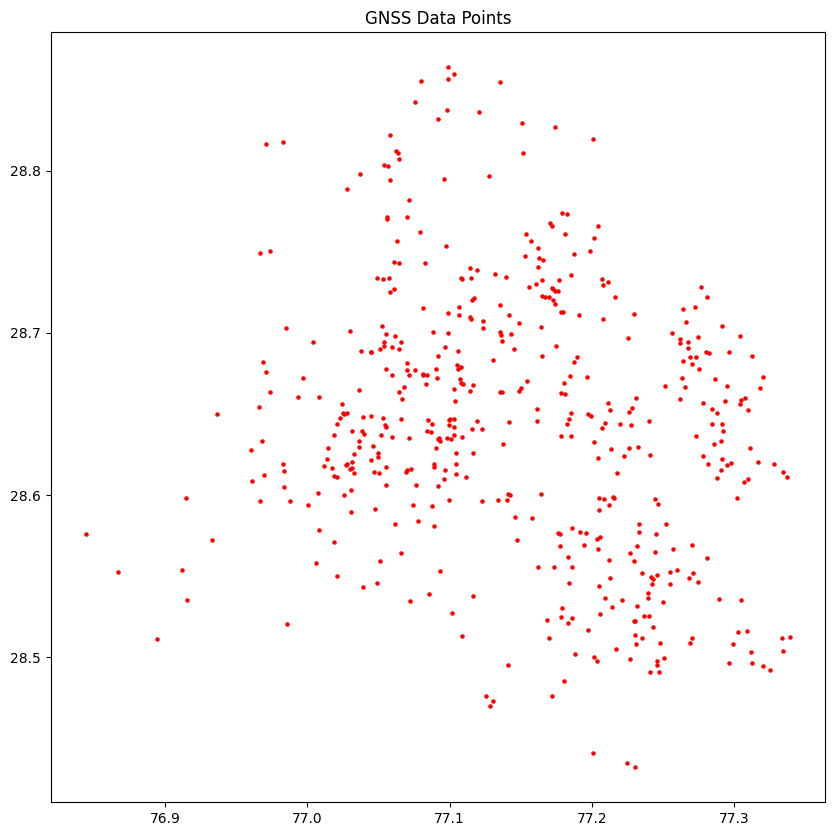

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

gnss_data_path = 'simulated_gnss_data_delhi.csv'
gnss_data = pd.read_csv(gnss_data_path)

# Checking the first few rows to understand the data structure
print(gnss_data.head())

# Converting the GNSS data to a GeoDataFrame
geometry = [Point(xy) for xy in zip(gnss_data['longitude'], gnss_data['latitude'])]
gnss_gdf = gpd.GeoDataFrame(gnss_data, geometry=geometry, crs='EPSG:4326')

# Plotting GNSS data points on a map
fig, ax = plt.subplots(figsize=(10, 10))
gnss_gdf.plot(ax=ax, markersize=5, color='red')
plt.title("GNSS Data Points")
plt.show()


In [5]:
pip install osmnx geopandas scikit-learn numpy pandas



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas numpy geopandas osmnx hmmlearn scikit-learn geopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.8/189.8 kB 776.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# Simulating GNSS data (Replacing it  with real data in practice)
np.random.seed(0)
n_points = 500

# Generating random lat/lon coordinates around a central point
center_lat, center_lon = 28.6139, 77.2090
lat_noise = np.random.normal(loc=0, scale=0.001, size=n_points)
lon_noise = np.random.normal(loc=0, scale=0.001, size=n_points)
timestamps = pd.date_range(start='2023-01-01', periods=n_points, freq='5s')

# Creating a DataFrame to represent GNSS data
gnss_data = pd.DataFrame({
    'latitude': center_lat + lat_noise,
    'longitude': center_lon + lon_noise,
    'timestamp': timestamps,
    'speed': np.abs(np.random.normal(loc=30, scale=5, size=n_points)),
    'heading': np.random.uniform(0, 360, size=n_points)
})

print(gnss_data.head())


    latitude  longitude           timestamp      speed     heading
0  28.615664  77.209383 2023-01-01 00:00:00  32.779813    1.723459
1  28.614300  77.208966 2023-01-01 00:00:05  34.462369  199.355787
2  28.614879  77.210096 2023-01-01 00:00:10  27.888426   41.001878
3  28.616141  77.208766 2023-01-01 00:00:15  30.523570  259.928831
4  28.615768  77.208653 2023-01-01 00:00:20  31.140267  251.321895


In [8]:
import osmnx as ox
import networkx as nx
from hmmlearn import hmm
from shapely.geometry import Point, LineString

# Downloading OSM data for the area around Delhi, India
place_name = "Delhi, India"
road_graph = ox.graph_from_place(place_name, network_type='drive')

# Projecting the road graph to UTM for accurate distance calculations
road_graph = ox.project_graph(road_graph)

# Creating  a GeoDataFrame for GNSS points
import geopandas as gpd

geometry = [Point(xy) for xy in zip(gnss_data.longitude, gnss_data.latitude)]
gnss_gdf = gpd.GeoDataFrame(gnss_data, geometry=geometry, crs='EPSG:4326')
gnss_gdf = gnss_gdf.to_crs(ox.graph_to_gdfs(road_graph, nodes=False).crs)

# HMM for Map Matching
def map_matching_hmm(gnss_gdf, road_graph):

    model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)


    X = np.column_stack([gnss_gdf.geometry.x, gnss_gdf.geometry.y])


    model.fit(X)

    # Predicting the state sequence
    states = model.predict(X)
    gnss_gdf['road_type'] = states
    return gnss_gdf

gnss_gdf = map_matching_hmm(gnss_gdf, road_graph)
print(gnss_gdf.head())


    latitude  longitude           timestamp      speed     heading  \
0  28.615664  77.209383 2023-01-01 00:00:00  32.779813    1.723459   
1  28.614300  77.208966 2023-01-01 00:00:05  34.462369  199.355787   
2  28.614879  77.210096 2023-01-01 00:00:10  27.888426   41.001878   
3  28.616141  77.208766 2023-01-01 00:00:15  30.523570  259.928831   
4  28.615768  77.208653 2023-01-01 00:00:20  31.140267  251.321895   

                         geometry  road_type  
0  POINT (716014.112 3167401.021)          1  
1  POINT (715976.126 3167249.107)          1  
2  POINT (716085.511 3167315.274)          1  
3  POINT (715952.800 3167452.755)          1  
4  POINT (715942.490 3167411.173)          1  


In [9]:
from geopy.distance import geodesic

def feature_engineering(gnss_gdf):
    # Calculating distance to the nearest road segment
    road_gdf = ox.graph_to_gdfs(road_graph, nodes=False)
    gnss_gdf['nearest_road'] = gnss_gdf.apply(
        lambda row: road_gdf.distance(row.geometry).min(), axis=1
    )

    # Computing  change in heading(directions)
    gnss_gdf['heading_change'] = gnss_gdf['heading'].diff().fillna(0)

    # More features can be added (speed, acceleration, etc.)
    return gnss_gdf

gnss_gdf = feature_engineering(gnss_gdf)
print(gnss_gdf[['nearest_road', 'heading_change']].head())


   nearest_road  heading_change
0      2.662410        0.000000
1     16.507166      197.632328
2     82.447869     -158.353909
3     52.699238      218.926953
4     28.218209       -8.606936


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = gnss_gdf[['speed', 'heading_change', 'nearest_road']]
y = gnss_gdf['road_type']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediction  and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Prepare the data
X = gnss_gdf[['speed', 'heading_change', 'nearest_road']]
y = gnss_gdf['road_type']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}


rf = RandomForestClassifier(random_state=42)

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=2)  # Print progress messages

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Prediction and evaluation using the best model
y_pred = best_rf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [12]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.4 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X = gnss_gdf[['speed', 'heading_change', 'nearest_road']]
y = gnss_gdf['road_type']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage used in update to prevent overfitting
    max_depth=5,           # Maximum depth of a tree
    subsample=0.8,         # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42        # Random seed
)

xgb_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100

Accuracy: 0.98
Confusion Matrix:
[[98  0]
 [ 2  0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [18]:
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully.")


Model saved successfully.


In [19]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
import pandas as pd

# Corrected Flask app initialization
app = Flask(__name__)

# Load the pre-trained model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json()
        print("Received data:", data)

        # Convert data to DataFrame
        df = pd.DataFrame(data)

        # Preprocess data if needed
        # For this example, we'll assume the data is already preprocessed

        # Convert DataFrame to numpy array
        features = df.to_numpy()

        # Make predictions
        predictions = model.predict(features)

        # Prepare response
        response = {'predictions': predictions.tolist()}

        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 118, i

SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
